#**TEXT CLASSIFICATION WITH BoW EXTRACTED FEATURES**

**Imports**

In [8]:
import pandas as pd

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics, neighbors
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


**Google Drive Mountain**

In [9]:
# Code to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv("/content/drive/MyDrive/processed_data.csv")
df.head()

,CATEGORY,CONTENT,PROCESSED_CONTENT
0,business,WASHINGTON — In an effort to deliver on Presid...,washington effort deliver president obama pled...
1,business,Latest Articles\n\nStarving for Income? Safe M...,latest article starving income safe money stoc...
2,business,Nigeria has overtaken South Africa as Africa's...,nigeria overtaken south africa africa largest ...
3,business,"Receiving Wide Coverage ...\n\nStress Tests, P...",receiving wide coverage stress test part ii ci...
4,business,The dollar steadied on Friday after a signific...,dollar steadied friday significant rise u prod...


In [11]:
print(df['PROCESSED_CONTENT'][0])

washington effort deliver president obama pledge last summer tackle emission drive climate change white house announced strategy limit release methane highly potent greenhouse gas methane strategy disclosed friday recent string climate change initiative white house unveiled rapid pace recent week lay groundwork regulation could affect agriculture oil gas coal industry carbon dioxide combustion fossil fuel biggest contributor climate change methane chief component natural gas estimated time potent trapping heat atmosphere methane emission make country greenhouse gas emission track increase official said among biggest source methane going atmosphere leak oil gas facility seepage coal mine landfill livestock especially cow advertisement administration strategy reduce methane emission lay timetable environmental protection agency department interior energy agriculture find way curtail source fully implemented policy methane strategy improve public health safety providing energy power commu

**Encoding the labels "CATEGORY"**

In [13]:
label_encoder = preprocessing.LabelEncoder()
df['CATEGORY'] = label_encoder.fit_transform(df['CATEGORY'])

In [15]:
df["CATEGORY"].value_counts()

,count
CATEGORY,
0,6554
1,6554
2,6554
3,6554


**Train/test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['PROCESSED_CONTENT'], df['CATEGORY'], test_size=0.2, random_state=42)

**Feature Extractions Using Bag of Words [BoW]**

In [ ]:
#Bag of words
vectorizer = CountVectorizer(min_df =2, ngram_range=(2,2))
bow_train_features = vectorizer.fit_transform(X_train)
bow_test_features = vectorizer.transform(X_test)

**Support Vector Machines**

Support Vector Machine using Bag of words

Accuracy:  92.64097899785017 

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1486
           1       0.96      0.96      0.96      1580
           2       0.89      0.93      0.91      1456
           3       0.95      0.90      0.92      1525

    accuracy                           0.93      6047
   macro avg       0.93      0.93      0.93      6047
weighted avg       0.93      0.93      0.93      6047



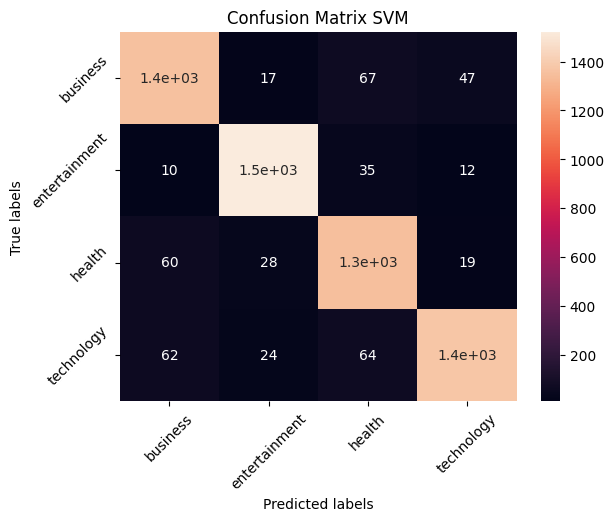

In [ ]:
#Support Vector Machines

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(bow_train_features,y_train)

predictions_SVM = SVM.predict(bow_test_features)

print("Support Vector Machine using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_SVM, y_test)*100,"\n")

print("Classification Report\n")
print(classification_report(y_test ,predictions_SVM))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_SVM)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix SVM');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**Logistic Regression**

Logistic Regression using Bag of words

Accuracy:  93.58359517115925 

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1486
           1       0.95      0.98      0.96      1580
           2       0.92      0.93      0.92      1456
           3       0.95      0.92      0.93      1525

    accuracy                           0.94      6047
   macro avg       0.94      0.94      0.94      6047
weighted avg       0.94      0.94      0.94      6047



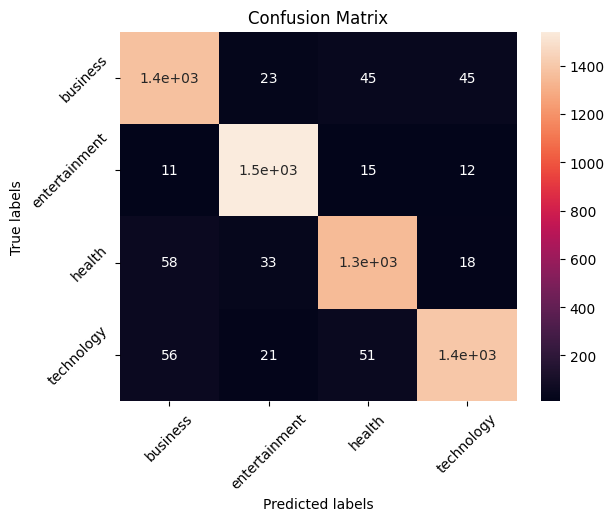

In [ ]:
#Logistic Regression

logRegModel = LogisticRegression()
logRegModel.fit(bow_train_features, y_train)

predictions_lr = logRegModel.predict(bow_test_features)

print("Logistic Regression using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_lr, y_test)*100,"\n")

print("Classification Report\n")
print(classification_report(y_test,predictions_lr))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_lr)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**Naive Bayes**

MultiNomial Naive Bayes using Bag of words

Accuracy:  93.51744666776915 

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1486
           1       0.95      0.98      0.96      1580
           2       0.94      0.91      0.93      1456
           3       0.93      0.93      0.93      1525

    accuracy                           0.94      6047
   macro avg       0.94      0.93      0.93      6047
weighted avg       0.94      0.94      0.94      6047



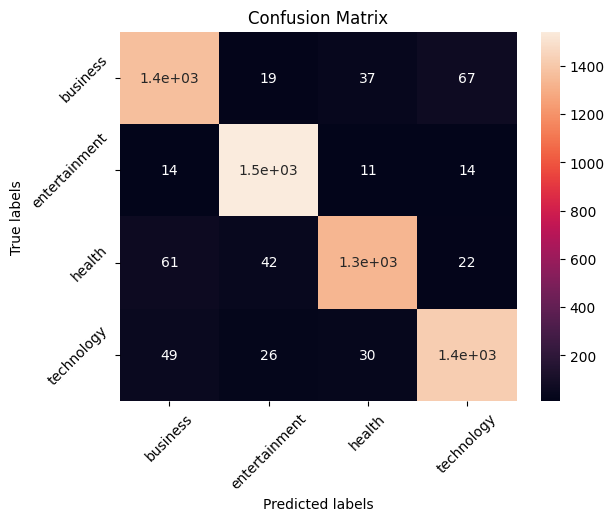

In [ ]:
#Naive Bayes
mnb = MultinomialNB()
mnb.fit(bow_train_features,y_train)

predictions_mnb = mnb.predict(bow_test_features)

print("MultiNomial Naive Bayes using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_mnb, y_test)*100,"\n")

print("Classification Report\n")
print(classification_report(y_test,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Naive Bayes');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**Random Forest**

Random Forest using Bag of words

Accuracy:  87.92789813130479 

Classification Report

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1486
           1       0.85      0.96      0.90      1580
           2       0.90      0.85      0.87      1456
           3       0.92      0.82      0.87      1525

    accuracy                           0.88      6047
   macro avg       0.88      0.88      0.88      6047
weighted avg       0.88      0.88      0.88      6047



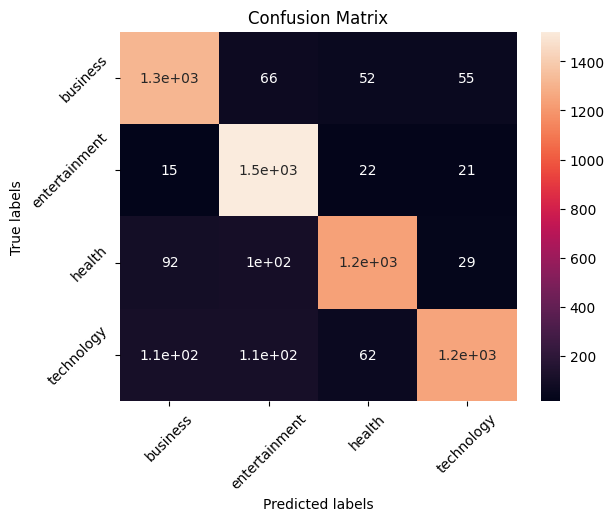

In [ ]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(bow_train_features,y_train)

predictions_rfc = rfc.predict(bow_test_features)

print("Random Forest using Bag of words\n")
print("Accuracy: ",accuracy_score(predictions_rfc, y_test)*100,"\n")

print("Classification Report\n")
print(classification_report(y_test,predictions_rfc))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_rfc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**K-Nearest-Neigbour**

In [ ]:
def knn(p,n,vector_type, metric=None):

    X_train, X_test, y_train, y_test = train_test_split(df_balanced['PROCESSED_CONTENT'], df_balanced['CATEGORY'], test_size=0.2, random_state=42)

    knn = neighbors.KNeighborsClassifier(n_neighbors=n, weights='distance', algorithm='auto', metric=metric, p=p, n_jobs=1)

    if vector_type == 'BoW':
        vectorizer = CountVectorizer(analyzer='word', input='content')
        train_vec = vectorizer.fit_transform(X_train)
        test_vec = vectorizer.transform(X_test)

    elif vector_type == 'tfidf':
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')
        train_vec = vectorizer.fit_transform(X_train)
        test_vec = vectorizer.transform(X_test)



    knn.fit(train_vec, y_train)
    predicted = knn.predict(test_vec)
    acc = metrics.accuracy_score(y_test, predicted)
    print('Accuracy: KNN with {}, neighbors: {}, distance metric: {}  = {}'.format(vector_type, n,metric, str(acc * 100) + '%'))

**Cosine Similarities**

In [ ]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'BoW','cosine')

Accuracy: KNN with BoW, neighbors: 2, distance metric: cosine  = 94.07970894658509%
Accuracy: KNN with BoW, neighbors: 3, distance metric: cosine  = 94.29469158260294%
Accuracy: KNN with BoW, neighbors: 4, distance metric: cosine  = 94.41045146353564%
Accuracy: KNN with BoW, neighbors: 5, distance metric: cosine  = 94.34430296014553%
Accuracy: KNN with BoW, neighbors: 6, distance metric: cosine  = 94.57582272201091%
Accuracy: KNN with BoW, neighbors: 7, distance metric: cosine  = 94.65850835124854%


**Euclidean**

In [ ]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'BoW','euclidean')

Accuracy: KNN with BoW, neighbors: 2, distance metric: euclidean  = 88.95319993385151%
Accuracy: KNN with BoW, neighbors: 3, distance metric: euclidean  = 88.4736232842732%
Accuracy: KNN with BoW, neighbors: 4, distance metric: euclidean  = 88.75475442368116%
Accuracy: KNN with BoW, neighbors: 5, distance metric: euclidean  = 88.63899454274848%
Accuracy: KNN with BoW, neighbors: 6, distance metric: euclidean  = 88.42401190673061%
Accuracy: KNN with BoW, neighbors: 7, distance metric: euclidean  = 87.54754423681165%
